In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from scipy.interpolate import interp1d
from data_loaders.survey_dataloader import learn_conversion_phq4_to_30d, learn_conversion_30d_to_phq4
from data_loaders.survey_dataloader import _load_data

In [2]:
df = pd.read_csv("/home/groups/swager/rsahoo/brfss_mental_health.csv")
df["PHQ_4"] = df["ADPLEAS1"] + df["ADDOWN1"] + df["FEELNERV"] + df["STOPWORY"]
y = (df["PHQ_4"].to_numpy().flatten() - 4.0).reshape(len(df), 1)
X = df["MENTHLTH"].to_numpy().flatten()

In [3]:
model1 = learn_conversion_30d_to_phq4()

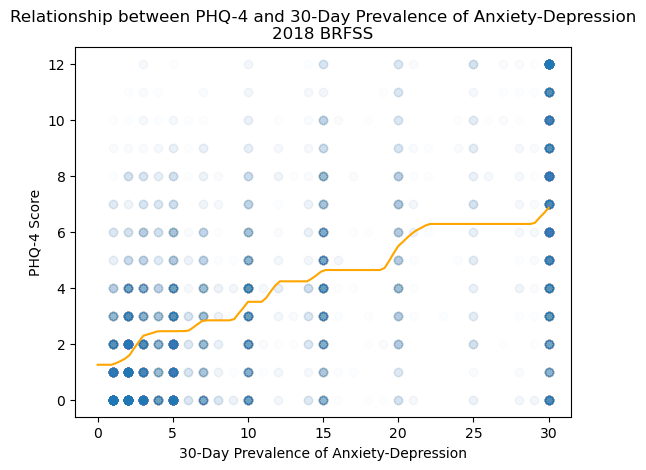

In [5]:
xs = np.linspace(0., 30., 100).reshape(100,1)
plt.plot(xs, model1(xs),  c="orange")
plt.scatter(X, y, alpha=0.01)
plt.ylabel("PHQ-4 Score")
plt.xlabel("30-Day Prevalence of Anxiety-Depression")
plt.title("Relationship between PHQ-4 and 30-Day Prevalence of Anxiety-Depression\n" + "2018 BRFSS")
plt.savefig("figs/conversion_mental_health_outcomes.pdf", bbox_inches="tight")